# Datasets

Datasets are what machine learning algorithms learn from.

Traditionally, they are structured such that each row is the representation of an object, and each column is some feature - a property of the object. The dataset is therefore a matrix.

A common machine learning dataset is the Iris dataset...

In [1]:
import pandas as pd
df = pd.read_csv("../data/iris.csv")
print(df)

     Sepal length  Sepal width  Petal length  Petal width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

This has been loaded from CSV. It has 150 rows, meaning that this dataset contains information on 150 iris flowers. It has five columns, meaning that for each flower, five properties have been measured.

Four of the columns are continuous numbers, and the fifth is a discrete class (the species of flower).

This dataset could be used in supervised learning - the petal width could be predicted from some combination of the other measurements (a regression problem), or the class of flower could be predicted from some combination of the other measurements (a classification problem). In fact most of supervised learning boils down to trying to predict one column value from information in other columns.

Or, this dataset could be used in unsupervised learning - the data might fall into identifiable clusters, or there might be redundant dimensions that can be removed while retaining the same information.

It can be hard to visualise data when it has five dimensions, but if columns are removed the data can be visualised more easily. The simplest version of this removes all but one column...

In [2]:
import sys; sys.path.append("..")
import discerus
sepal_length = df.iloc[:, [0]]
print(sepal_length)
discerus.plot_dataset(sepal_length)

     Sepal length
0             5.1
1             4.9
2             4.7
3             4.6
4             5.0
5             5.4
6             4.6
7             5.0
8             4.4
9             4.9
10            5.4
11            4.8
12            4.8
13            4.3
14            5.8
15            5.7
16            5.4
17            5.1
18            5.7
19            5.1
20            5.4
21            5.1
22            4.6
23            5.1
24            4.8
25            5.0
26            5.0
27            5.2
28            5.2
29            4.7
..            ...
120           6.9
121           5.6
122           7.7
123           6.3
124           6.7
125           7.2
126           6.2
127           6.1
128           6.4
129           7.2
130           7.4
131           7.9
132           6.4
133           6.3
134           6.1
135           7.7
136           6.3
137           6.4
138           6.0
139           6.9
140           6.7
141           6.9
142           5.8
143       

<Figure size 640x480 with 1 Axes>

Here the distribution of all the values in the first feature column is shown. No output label was supplied, so the column is treated as a single variable. If an output label is supplied, the different distributions can be seen.

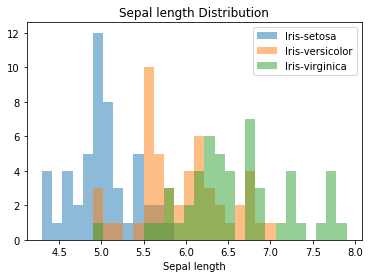

In [3]:
sepal_length_annotated = df.iloc[:, [0, -1]]
discerus.plot_dataset(sepal_length_annotated, output=True)

A slightly more complicated dataset contains two input columns. Rather than showing their individual distributions, they can be plotted together to show where they lie in their shared space.

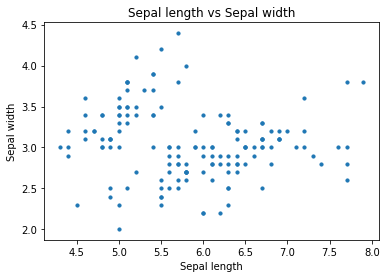

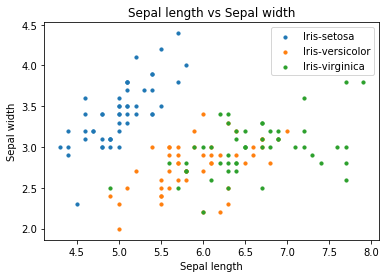

In [4]:
sepal_data = df.iloc[:, [0, 1]]
discerus.plot_dataset(sepal_data)
sepal_data_annotated = df.iloc[:, [0, 1, -1]]
discerus.plot_dataset(sepal_data_annotated, output=True)

Here the two variables have been visualised with and without output information. In the former, it can roughly be seen that there are two clusters, and when class information is added, it can be seen that one of these is a distinct class whereas the other two, *Iris versicolor* and *Iris virginica*, are much more mixed up. You could draw a line between *Iris setosa* and the other two, meaning it is **linearly separable** from the other two classes.

There is nothing special about these two columns. Some other combination could have been used...

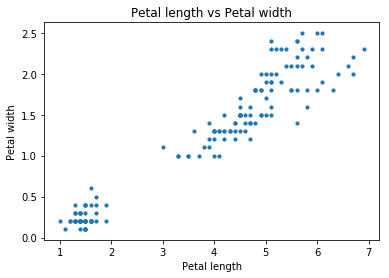

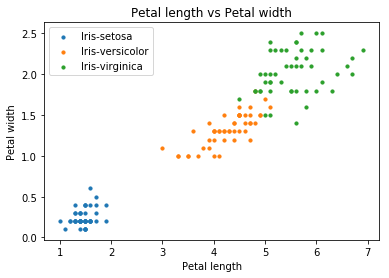

In [5]:
petal_data = df.iloc[:, [2, 3]]
discerus.plot_dataset(petal_data)
petal_data_annotated = df.iloc[:, [2, 3, -1]]
discerus.plot_dataset(petal_data_annotated, output=True)

Again *Iris setosa* is much more distinct from the other two classes than they are from each other.

It is harder to visualise the full dataset on one plot like this because it is higher dimensional. Two dimensions is easier, three dimensions is more fiddly to visualise, and higher dimensions are essentially impossible. However, the full dataset can be visualised by showing all the individual distributions, and all pairwise comparisons of features.

Populating the interactive namespace from numpy and matplotlib


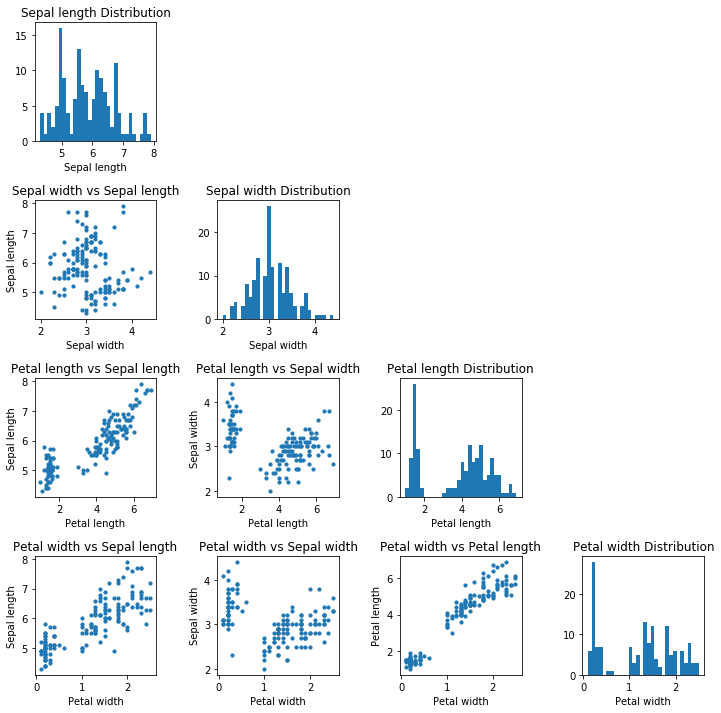

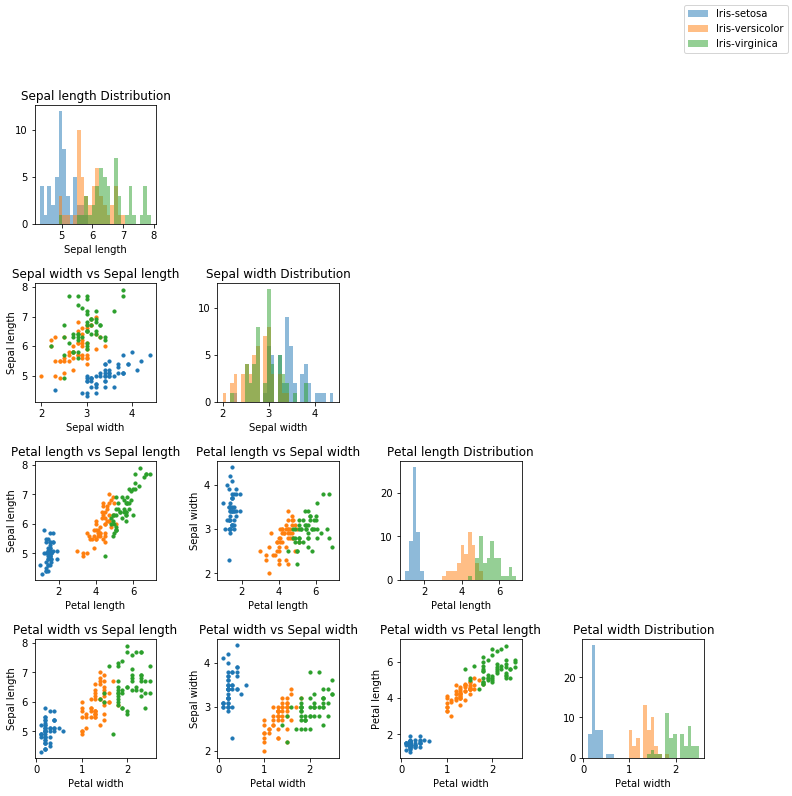

In [6]:
%pylab inline
pylab.rcParams["figure.figsize"] = (12, 12)
discerus.plot_dataset(df.iloc[:, :-1])
discerus.plot_dataset(df, output=True)

Now the whole information content of the dataset can be seen - again first without label information and then with it added in. This can be a good way to see which features are correlated with what (petal width and petal length seem to be very highly correlated, for example), and to see which combinations of features can be used to separate the classes (speal width and sepal length seem to be uniquely poor at separating *Iris versicolor* and *Iris virginica*, though none of the others are great at it).